# Sum approximation


We want to show an approximate method of calculating the sum of a large array by calculating small batch statistics.

First, let’s generate the data

In [0]:
import numpy as np
N = int(1e6)	
a = np.random.randint(0, 101, size=N)

print(a, a.shape)

(array([78, 33, 32, ..., 54, 29, 27]), (1000000,))


Here we take 100 samples

In [0]:
c = np.random.choice(a, size=100)
print(c.shape)

(100,)



Now to compare to approximated sum to the real one!

We find the mean value of the batch and assume the whole array has similar statistics.


In [0]:
print('Approximate with {} samples: {}. Exact: {}'.format(len(c), c.mean()*N, a.sum()))

Approximate with 100 samples: 55520000.0. Exact: 49963052


If we increase the batch/sample size, we can gen even closer!

In [0]:
c = np.random.choice(a, size=1000)
print('Approximate with {} samples: {}. Exact: {}'.format(len(c), c.mean()*N, a.sum()))

Approximate with 1000 samples: 49090000.0. Exact: 49963052


# Biased dice


In [0]:
import numpy as np

class Dice():
  def __init__(self):
    is_biased = np.random.random_sample(1) > 0.5
    if is_biased:
      # Generate probabilities around an unbiased dice
      p = np.random.normal(1./6, scale=0.05, size=6)
      self.p = p/p.sum() # Normalize to 1
    else:
      # Generate uniform probabilities
      self.p = np.ones(6)/6.
    
  def roll(self, n=1):
    return np.random.choice(range(1,7), size=n, p=self.p)
  
  
dice = Dice()
# We don't know if the dice is biased or not
# We can only observe samples from rolling it

print(dice.roll())
print(dice.roll(n=5))

[1]
[2 6 5 1 5]


In [0]:
samples = dice.roll(n=600)

bins = [0] * 6
for s in samples:
  bins[s-1] += 1
  
print(bins)

[89, 113, 107, 92, 96, 103]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


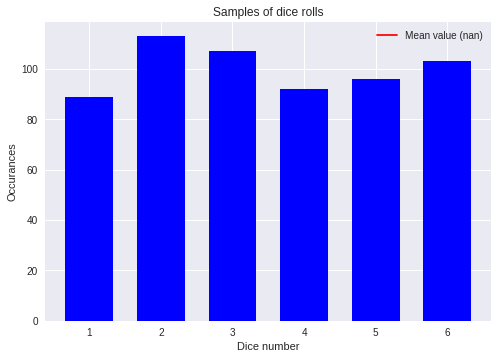

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()

def plot_bins(fig, samples):
  x = range(1, 7)
  width = 1/1.5
  plt.bar(x, bins, width, color="blue")
  plt.axvline(x=samples.mean(), c='r', label='Mean value ({:.2f})'.format(samples.mean()))
  plt.ylabel('Occurances')
  plt.xlabel('Dice number')
  plt.title('Samples of dice rolls')
  plt.legend()
  return fig
  
plot_bins(fig, samples)
plt.show()

In [0]:
# To make an animation, we need ffmpeg
!apt-get update && apt-get install ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.3.4-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


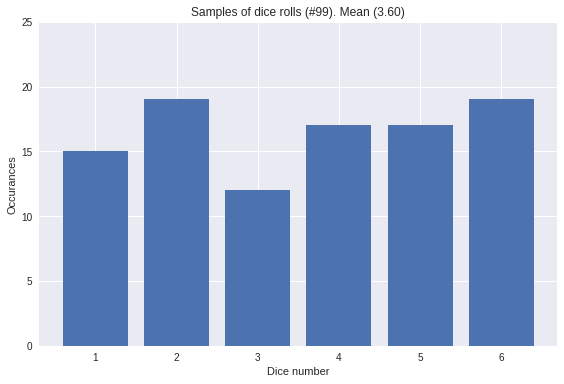

In [0]:
import matplotlib.animation as animation
from IPython.display import HTML

samples = np.array([])
fig = plt.figure()

n = 100 # Number of frames
x = range(1,7)
barcollection = plt.bar(x, [0]*6)
plt.ylim(0, n/4.)
plt.ylabel('Occurances')
plt.xlabel('Dice number')
plt.title('Samples of dice rolls')
plt.tight_layout()

def get_bins(samples):
  bins = [0] * 6
  for s in samples:
    bins[s-1] += 1
  return bins

def animate(i):
  global samples
  if len(samples) < i:
    # We need to roll some more dice
    new_samples = dice.roll(n=i - len(samples))
    samples = np.append(samples, new_samples).astype(np.int)

  mean = samples.mean() if len(samples) > 0 else 0
  plt.title('Samples of dice rolls (#{}). Mean ({:.2f})'.format(
              len(samples), mean))
  
  y = get_bins(samples)
  for i, b in enumerate(barcollection):
      b.set_height(y[i])
  return barcollection,

ani=animation.FuncAnimation(fig, animate, repeat=False, 
                              blit=False,frames=n, interval=100)

# print('Ground truth: ', dice.p)

# HTML(ani.to_jshtml()) 
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # For google colab
HTML(ani.to_html5_video())

# We can save it here
# from matplotlib.animation import FFMpegWriter
# samples = np.array([])
# writer = FFMpegWriter(fps=15)
# ani.save("movie.mp4", writer=writer)
